In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import os
import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
batch_size=100

cuda:0


In [2]:
learning_rate=1e-3
epochs=100
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [3]:
class ae(nn.Module):
    def __init__(self):
        super(ae,self).__init__()
        self.layer1=nn.Sequential(
            nn.Linear(28*28,400),
            nn.Sigmoid()
        )
        self.layer2=nn.Sequential(
            nn.Linear(400,300),
            nn.Sigmoid()
        )
        self.layer3=nn.Sequential(
            nn.Linear(300,200),
            nn.Sigmoid()
        )
        self.layer4=nn.Sequential(
            nn.Linear(200,784),
            nn.Sigmoid()
        )
    def forward(self,x):
        x=x.view(batch_size,-1)
        out=self.layer1(x)
#         print(out.shape)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         print(out.shape)
        out=out.view(batch_size,-1,28,28)
        
        return out
encoder=ae().cuda()
loss_fun=nn.MSELoss()
optimizer=torch.optim.Adam(encoder.parameters(),lr=learning_rate)

In [4]:
#trainging phase
if(os.path.isfile('./saved_data/stacked_autoencoder.ckpt')==True):
    print("--------------load saved data--------------")
    encoder.load_state_dict(torch.load('./saved_data/stacked_autoencoder.ckpt'))
for i in range(epochs):
    for j , [image,label] in enumerate(train_loader):
        image=Variable(image).cuda()
#         print(image.shape)
        optimizer.zero_grad()
        output=encoder(image)
        loss=loss_fun(output,image)
        loss.backward()
        optimizer.step()
    if(i%10==0):
        print("epochs : ",i,", loss : ",loss)

epochs :  0 , loss :  tensor(1.00000e-02 *
       6.1362, device='cuda:0')
epochs :  10 , loss :  tensor(1.00000e-03 *
       8.7462, device='cuda:0')
epochs :  20 , loss :  tensor(1.00000e-03 *
       5.3467, device='cuda:0')
epochs :  30 , loss :  tensor(1.00000e-03 *
       4.2166, device='cuda:0')
epochs :  40 , loss :  tensor(1.00000e-03 *
       3.4670, device='cuda:0')
epochs :  50 , loss :  tensor(1.00000e-03 *
       2.7610, device='cuda:0')
epochs :  60 , loss :  tensor(1.00000e-03 *
       2.5260, device='cuda:0')
epochs :  70 , loss :  tensor(1.00000e-03 *
       2.5615, device='cuda:0')
epochs :  80 , loss :  tensor(1.00000e-03 *
       2.1167, device='cuda:0')
epochs :  90 , loss :  tensor(1.00000e-03 *
       1.8934, device='cuda:0')


In [5]:
print("saved data")
torch.save(encoder.state_dict(), './saved_data/stacked_autoencoder.ckpt')

saved data


In [7]:
#test phase

encoder.load_state_dict(torch.load('./saved_data/stacked_autoencoder.ckpt'))
for i ,[t_image,t_label]in enumerate(test_loader):
    t_image=Variable(t_image).cuda()
    t_out=encoder(t_image)
    loss=loss_fun(t_out,t_image)
    print("loss : ",loss)

loss :  tensor(1.00000e-03 *
       1.9789, device='cuda:0')
loss :  tensor(1.00000e-03 *
       1.9693, device='cuda:0')
loss :  tensor(1.00000e-03 *
       1.9015, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.0632, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.3761, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.2231, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.0653, device='cuda:0')
loss :  tensor(1.00000e-03 *
       1.8834, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.1811, device='cuda:0')
loss :  tensor(1.00000e-03 *
       1.9764, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.0481, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.1913, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.1551, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.2147, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.2344, device='cuda:0')
loss :  tensor(1.00000e-03 *
       2.0723, device='cuda:0')
loss :  tensor(1.00000e-

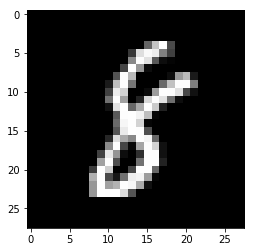

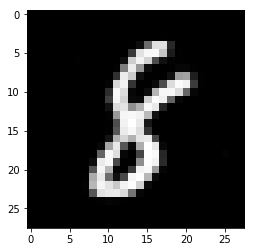

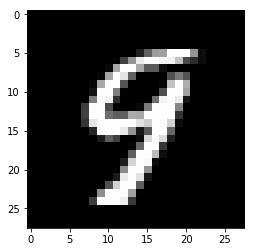

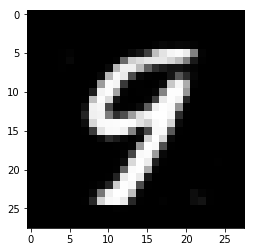

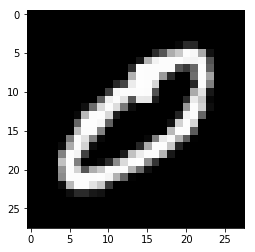

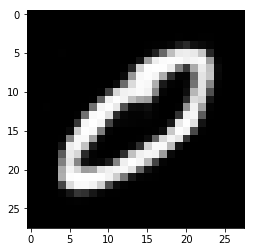

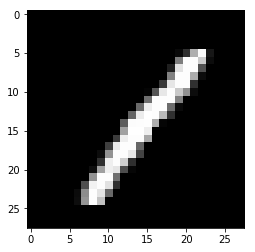

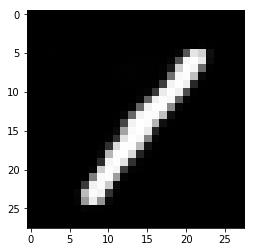

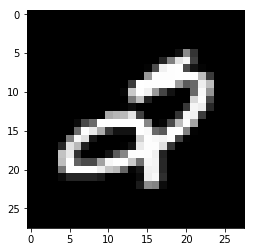

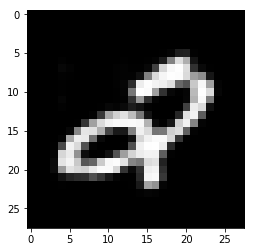

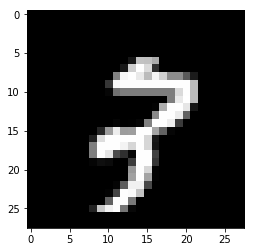

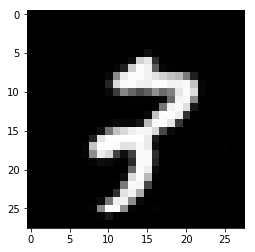

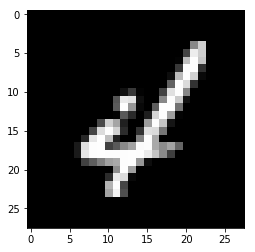

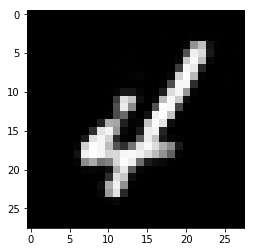

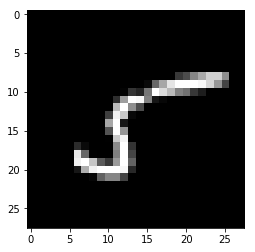

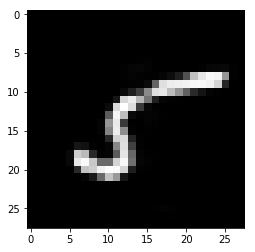

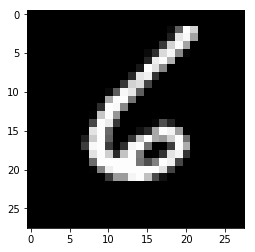

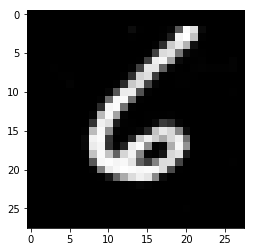

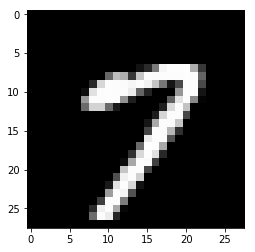

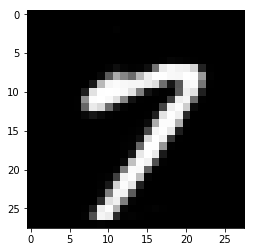

In [8]:
for i in range(10):
    input_image=t_image[i].cpu()
    output_image=t_out[i].cpu()
    input_image=input_image.data.numpy()
    output_image=output_image.data.numpy()
    plt.imshow(input_image[0],cmap='gray')
    plt.show()
    plt.imshow(output_image[0],cmap='gray')
    plt.show()
